In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

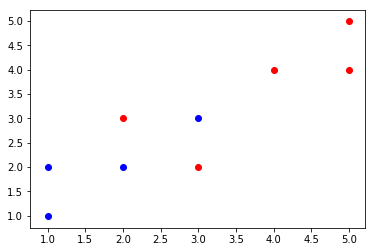

In [9]:
dfData=pd.read_csv("./data.csv")
data=dfData.iloc[:,[0,1]].T.values
target=dfData.iloc[:,[2]].T.values
colors=["red","blue"]
for i in range(len(colors)):
    x1=data[0,:][target[0]==i]
    x2=data[1,:][target[0]==i]
    plt.scatter(x1,x2,c=colors[i],marker="o")
plt.show()

In [4]:
#第一层的激活函数使用sigmod
def g1(z1):
    return 1/(1+np.exp(-z1))
def g1Prime(z1):
    a=g1(z1)
    return a-np.square(a)
#第二层的激活函数使用sigmod
def g2(z2):
    return 1/(1+np.exp(-z2))
def g2Prime(z2):
    a=g1(z2)
    return a-np.square(a)

In [166]:
#使用两层的神经网络处理线性不可分的数据
#第零层为数据输入层
#第二层为隐藏层(神经元个数为2)
#第三层为输出层(神经元个数为1)
ln=0.3
x=data
m=x.shape[1]
w1=np.random.randn(2,2)*0.01
b1=np.zeros((2,1))
w2=np.random.randn(1,2)*0.01
b2=np.zeros((1,1))
for i in xrange(10000):
    z1=np.dot(w1,x)+b1
    a1=g1(z1)
    z2=np.dot(w2,a1)+b2
    a2=g2(z2)
    #cost function
    L=np.sum(-(target*np.log(a2)+(1-target)*np.log(1-a2)),axis=1,keepdims=True)/m
    dz2=a2-target
    dw2=np.dot(dz2,a1.T)/m
    db2=np.sum(dz2,axis=1,keepdims=True)/m
    dz1=np.dot(w2.T,dz2)*g1Prime(z1)
    dw1=np.dot(dz1,x.T)/m
    db1=np.sum(dz1)/m
    w2-=ln*dw2
    b2-=ln*db2
    w1-=ln*dw1
    b1-=ln*db1
print(L)

[[0.16812381]]


In [134]:
#隐藏层采用两个神经单元发现误差还是比较大
test=np.array([[1,2],[2,2],[2.5,2.5],[3,3],[4,4],[5,5],[6,6],[7,7],[0,0]]).T
z1=np.dot(w1,test)+b1
a1=g1(z1)
z2=np.dot(w2,a1)+b2
a2=g2(z2)
print(a2,target)

(array([[9.99679598e-01, 9.97346120e-01, 5.27707510e-01, 4.92019548e-01,
        5.04458612e-03, 1.15333368e-05, 1.08963604e-05, 1.08936721e-05,
        9.99769861e-01]]), array([[1, 1, 1, 1, 0, 0, 0, 0, 0]]))


In [175]:
#使用两层的神经网络处理线性不可分的数据
#第零层为数据输入层
#第二层为隐藏层(神经元个数为15)
#第三层为输出层(神经元个数为1)
ln=0.25
x=data
m=x.shape[1]
w1=np.random.randn(15,2)*0.01
b1=np.zeros((15,1))
w2=np.random.randn(1,15)*0.01
b2=np.zeros((1,1))
for i in xrange(10000):
    z1=np.dot(w1,x)+b1
    a1=g1(z1)
    z2=np.dot(w2,a1)+b2
    a2=g2(z2)
    #cost function
    L=np.sum(-(target*np.log(a2)+(1-target)*np.log(1-a2)),axis=1,keepdims=True)/m
    dz2=a2-target
    dw2=np.dot(dz2,a1.T)/m
    db2=np.sum(dz2,axis=1,keepdims=True)/m
    dz1=np.dot(w2.T,dz2)*g1Prime(z1)
    dw1=np.dot(dz1,x.T)/m
    db1=np.sum(dz1)/m
    w2-=ln*dw2
    b2-=ln*db2
    w1-=ln*dw1
    b1-=ln*db1
print(L)

[[0.00813994]]


In [176]:
test=np.array([[1,2],[2,2],[2.5,2.5],[3,3],[4,4],[5,5],[6,6],[7,7],[0,0]]).T
z1=np.dot(w1,test)+b1
a1=g1(z1)
z2=np.dot(w2,a1)+b2
a2=g2(z2)
print(a2,target)

(array([[9.99504311e-01, 9.99298773e-01, 9.92074056e-01, 9.65892575e-01,
        6.85022209e-03, 1.19384070e-06, 1.67822291e-07, 1.31423794e-07,
        9.99999969e-01]]), array([[1, 1, 1, 1, 0, 0, 0, 0, 0]]))
